# 1.) Pull in Data and Convert ot Monthly

In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [42]:
df['Diff'] = df['Adj Close'].diff().shift(-1)
df['Target'] = np.sign(df["Diff"])
df['option premium'] = 0.08*df["Adj Close"]
df

,Adj Close,Diff,Target,option premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-09-30,170.984741,-0.439423,-1.0,13.678779
2023-10-31,170.545319,19.404678,1.0,13.643625
2023-11-30,189.949997,2.580002,1.0,15.196000


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [44]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [45]:
y = df.loc[:"2023-09-30","Target"].copy()
df2 = df.loc[:"2023-09-30",:].copy()

In [85]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
log_reg = LogisticRegression().fit(X_normalized,y)

In [86]:
df2

,Adj Close,Diff,Target,option premium,prediction,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 4.) Add columns, prediction and profits.

In [94]:
y_pred = log_reg.predict(X_normalized)

In [95]:
df2["prediction"] = y_pred

In [96]:
df2["Profits"] = 0

In [97]:
df2

,Adj Close,Diff,Target,option premium,prediction,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,0
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,0
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0


# 5.) Plot profits over time

In [98]:
df2.loc[(df["Target"] == 1)&(df2["prediction"] == 1),"Profits"] = df2["option premium"]
df2.loc[(df["Target"] == -1)&(df2["prediction"] == 1),"Profits"] = 100*df2['Diff']+df2["option premium"]

In [99]:
df2

,Adj Close,Diff,Target,option premium,prediction,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


[]

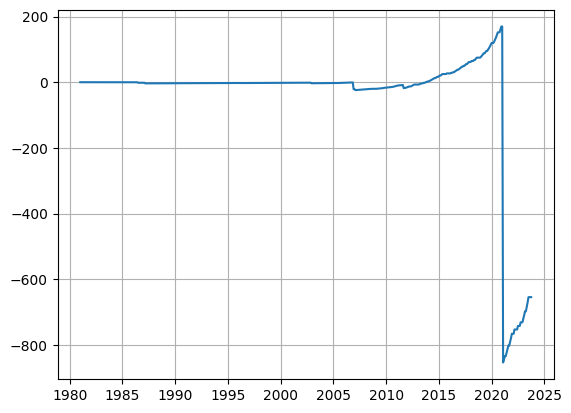

In [100]:
plt.plot(np.cumsum(df2["Profits"]))
plt.grid()
plt.plot()

# 5.5.) Short write up about how you see your skils valuable to PJ and/or Philip Liu

We could apply what we've learnt from the Machine Learning class on the platform, use the GPUs to build new models.